# JaCoCo Visualization

In [30]:
import pandas as pd
from matplotlib import pyplot as plt

df_jacoco = pd.read_csv('../../generated/code-analysis/jacoco.csv')

achievements = df_jacoco[df_jacoco['game_mode'] == 'Achievements']
leaderboard = df_jacoco[df_jacoco['game_mode'] == 'Leaderboard']

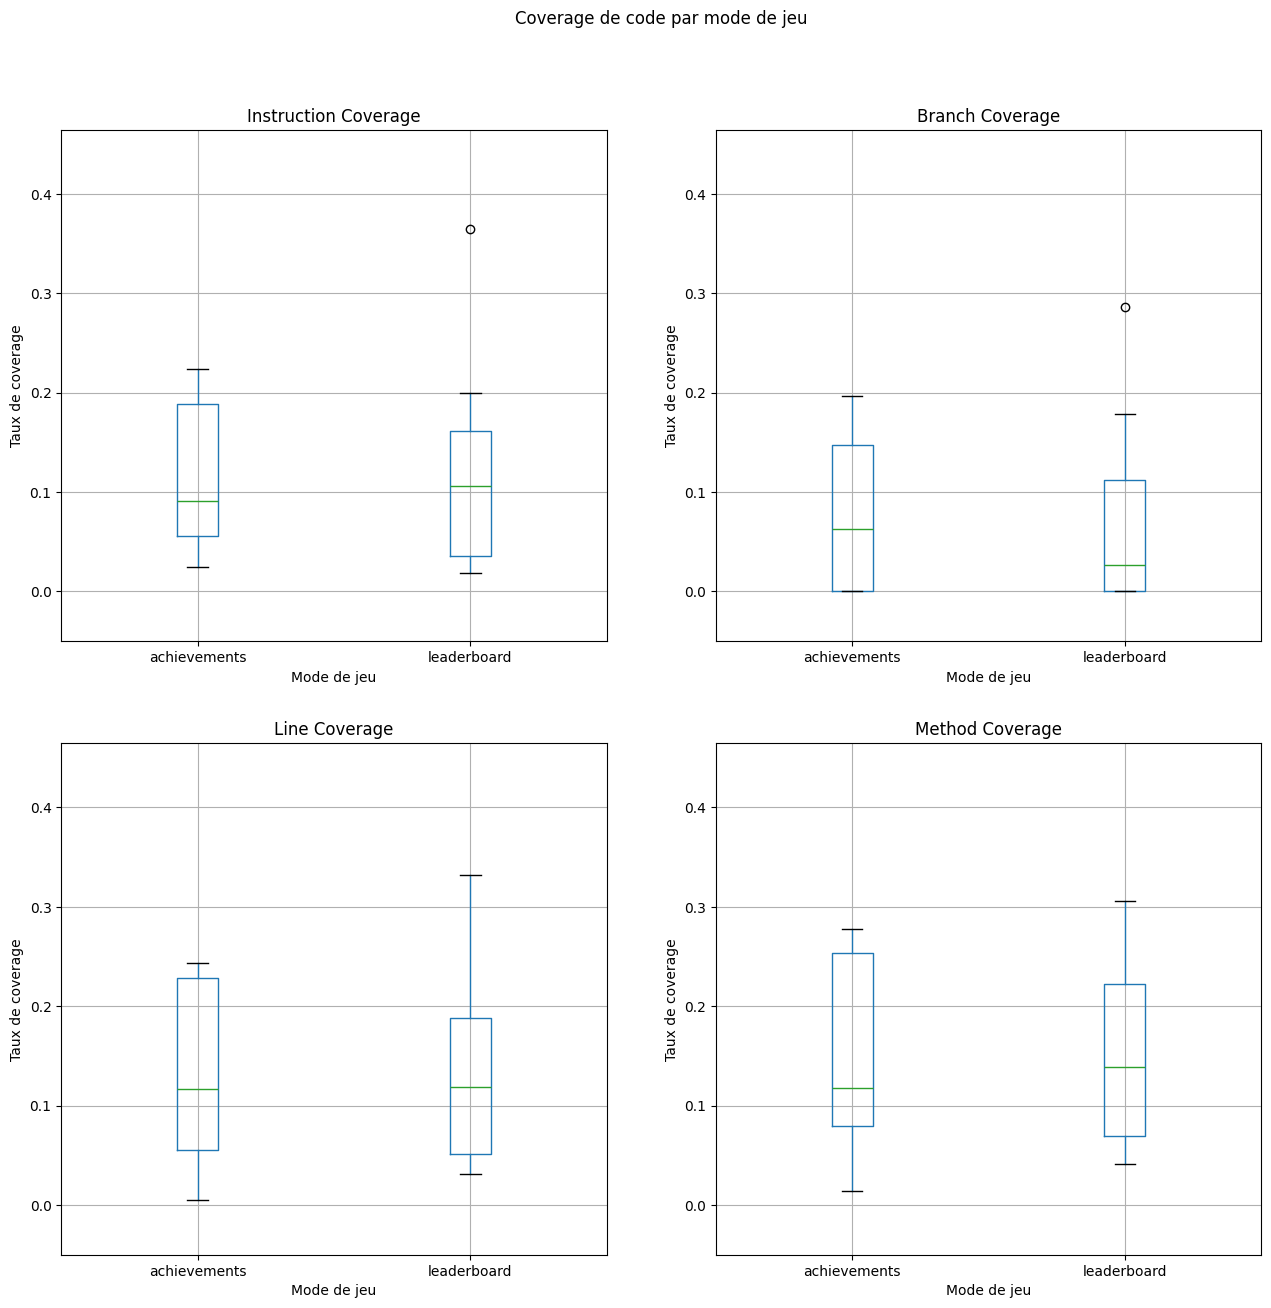

In [31]:

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
axs = axs.ravel()

y_max = df_jacoco[cols].max().max() + 0.1

for i, metric in enumerate(cols):
    ax = axs[i]
    bp = df_jacoco.boxplot(column=metric, by='game_mode', ax=ax)
    ax.set_title(f'{metric.capitalize()} Coverage')
    ax.set_ylabel('Taux de coverage')
    ax.set_xlabel('Mode de jeu')
    ax.grid(True)
    ax.set_ylim(-0.05, y_max)

plt.suptitle('Coverage de code par mode de jeu')
plt.show()

# Test de Mann-Whitney U entre les deux groupes pour déterminer s'il y a une différence significative (effet d'ordre).

In [32]:
def vargha_delaney_a12(x, y):
    m, n = len(x), len(y)
    rank = stats.rankdata(np.concatenate([x, y]))
    rank_x = rank[:m]
    r1 = np.sum(rank_x)
    U1 = r1 - m*(m+1)/2
    return U1 / (m*n)

## Comparaison des performances - Groupe A (session 1) vs Groupe B (session 2)

In [33]:
data_a1_b2 = []

for metric in cols:
    group_a_s1 = df_jacoco[(df_jacoco['group'] == 'A') & (df_jacoco['session'] == 1)][metric]
    group_b_s2 = df_jacoco[(df_jacoco['group'] == 'B') & (df_jacoco['session'] == 2)][metric]

    # Test de normalité
    _, p_value_achievements = stats.shapiro(group_a_s1)
    _, p_value_leaderboard = stats.shapiro(group_b_s2)
    normal_dist = p_value_achievements > 0.05 and p_value_leaderboard > 0.05

    # T-test ou Mann-Whitney selon la normalité
    if normal_dist:
        stat, p_value = stats.ttest_ind(group_a_s1, group_b_s2)
        test_name = "T-test"
    else:
        stat, p_value = stats.mannwhitneyu(group_a_s1, group_b_s2, alternative='two-sided')
        test_name = "Mann-Whitney U"

    a12 = vargha_delaney_a12(group_a_s1.values, group_b_s2.values)
    data_a1_b2.append([metric.capitalize(), test_name, p_value, p_value < 0.05, 0.05, a12])

df_a1_b2 = pd.DataFrame(data_a1_b2, columns=['metric', 'test_name', 'p_value', 'significant', 'alpha', 'vargha_delaney_a12'])
df_a1_b2

,metric,test_name,p_value,significant,alpha,vargha_delaney_a12
0,Instruction,T-test,0.921411,False,0.05,0.570312
1,Branch,Mann-Whitney U,0.621209,False,0.05,0.421875
2,Line,Mann-Whitney U,0.430558,False,0.05,0.625000
3,Method,Mann-Whitney U,0.673745,False,0.05,0.570312


## Comparaison des performances - Groupe A (session 2) vs Groupe B (session 1)

In [34]:
data_a2_b1 = []
for metric in cols:
    group_a_s2 = df_jacoco[(df_jacoco['group'] == 'A') & (df_jacoco['session'] == 2)][metric]
    group_b_s1 = df_jacoco[(df_jacoco['group'] == 'B') & (df_jacoco['session'] == 1)][metric]

    # Test de normalité
    _, p_value_achievements = stats.shapiro(group_a_s2)
    _, p_value_leaderboard = stats.shapiro(group_b_s1)
    normal_dist = p_value_achievements > 0.05 and p_value_leaderboard > 0.05

    # T-test ou Mann-Whitney selon la normalité
    if normal_dist:
        stat, p_value = stats.ttest_ind(group_a_s2, group_b_s1)
        test_name = "T-test"
    else:
        stat, p_value = stats.mannwhitneyu(group_a_s2, group_b_s1, alternative='two-sided')
        test_name = "Mann-Whitney U"

    a12 = vargha_delaney_a12(group_a_s2.values, group_b_s1.values)
    data_a2_b1.append([metric.capitalize(), test_name, p_value, p_value < 0.05, 0.05, a12])

df_a2_b1 = pd.DataFrame(data_a2_b1, columns=['metric', 'test_name', 'p_value', 'significant', 'alpha', 'vargha_delaney_a12'])
df_a2_b1

,metric,test_name,p_value,significant,alpha,vargha_delaney_a12
0,Instruction,T-test,0.442075,False,0.05,0.593750
1,Branch,Mann-Whitney U,0.234832,False,0.05,0.679688
2,Line,T-test,0.483504,False,0.05,0.562500
3,Method,Mann-Whitney U,0.832907,False,0.05,0.539062
